In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer

In [185]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
pd.set_option('display.max_columns', None)

In [186]:
train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,Y,No,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,Y,No,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Y,Yes,14,3,4,80,0,1,4,3,1,0,1,0


In [187]:
train.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,2.055272,2.732993,6458.690476,14247.159864,2.703231,15.152211,3.150510,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,1.106040,1.102477,4724.845883,7133.767499,2.521301,3.652543,0.357723,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2858.750000,7912.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4850.500000,14225.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,3.000000,4.000000,8380.250000,20372.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
user_id                     1176 non-null int64
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1176 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus          

In [189]:
train['Attrition'] = train['Attrition'].map(lambda x:1 if x=='Yes' else 0)
from sklearn.preprocessing import LabelEncoder

In [190]:
for feature in train.columns:
    print(train[feature].value_counts())

1469    1
515     1
495     1
496     1
497     1
       ..
969     1
971     1
972     1
973     1
0       1
Name: user_id, Length: 1176, dtype: int64
35    66
34    58
29    56
36    56
40    51
30    51
31    51
33    48
32    47
38    45
37    42
27    40
28    39
45    36
42    36
39    35
26    33
41    32
44    27
46    26
24    21
47    21
49    21
50    20
43    19
25    16
55    15
48    15
51    15
52    15
53    14
54    14
22    12
21    12
23    11
56    10
58    10
20    10
59     9
19     7
18     7
60     4
57     3
Name: Age, dtype: int64
0    988
1    188
Name: Attrition, dtype: int64
Travel_Rarely        830
Travel_Frequently    220
Non-Travel           126
Name: BusinessTravel, dtype: int64
1082    5
1329    5
1146    4
329     4
530     4
       ..
913     1
905     1
902     1
897     1
104     1
Name: DailyRate, Length: 783, dtype: int64
Research & Development    772
Sales                     351
Human Resources            53
Name: Department, dtype: int64
1    

In [191]:
# 去掉没用的列，员工号码，标准工时
train = train.drop(['EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount'], axis=1)
test = test.drop(['EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount'], axis=1)

In [192]:
# 对于分类特征进行特征编码
attr = ['BusinessTravel', 'Department','Education','EducationField','Gender','JobRole',
        'MaritalStatus','OverTime']
# print(train.shape)
# print(train.columns)
train = pd.get_dummies(train, columns=attr)
test = pd.get_dummies(test, columns=attr)
# print(train.shape)
print(train.columns)

Index(['user_id', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Ge

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [194]:
x_train, x_valid, y_train, y_valid = train_test_split(train.drop('Attrition', axis=1), train['Attrition'], test_size=0.2)

In [195]:
def show_feature_importance(feature_list, feature_importance):
	# 设定阈值
	fi_threshold = 20
	# 重要特征的下标
	important_idx = np.where(feature_importance > fi_threshold)[0]
	# 特征名称
	important_features = [feature_list[i] for i in important_idx]
	# 重要特征
	sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
	# 可视化
	pos = np.arange(sorted_idx.shape[0]) + 0.5
	plt.subplot(1, 2, 2)
	plt.title('Feature Importance')
	plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
	plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
	plt.xlabel('Relative Importance')
	plt.draw()
	plt.show()

In [198]:
# LR模型
model = LogisticRegression(max_iter=100, verbose=True, random_state=33, tol=1e-4)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wangjian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=33, solver='lbfgs', tol=0.0001, verbose=True,
                   warm_start=False)

[ 1.74953453e-01 -2.45915144e+01 -6.37574806e-01  9.66054974e+01
 -3.60775825e+01 -1.44434428e+00 -2.51798408e+01 -2.80908097e+00
 -4.06001495e+01 -2.12738229e-01  1.66829142e-02  1.00000000e+02
 -5.00801444e+01  4.34547174e-01 -1.05286511e+01 -3.95173890e+01
 -1.60222016e+01 -4.02730861e+01 -3.19014146e+01 -3.88337930e+01
 -9.54216762e+01  4.89902473e+01 -8.87048980e+01 -9.83023997e+00
  1.72920570e+01 -7.19624685e+00  2.84424868e+00 -1.42273950e+01
  1.16487165e+01 -2.18481323e+00 -2.47169483e+00  9.10049908e+00
 -4.49559377e+00  3.17172965e-01  3.18711282e+00 -1.11380249e+01
  4.78142746e+00 -7.10864925e+00 -1.92719913e-01  1.07364240e+01
 -4.99913741e+00  5.26470763e+00 -3.29488820e+00  3.17146579e+00
  1.19452756e+01  6.50098989e-01 -8.29018848e+00 -1.81772488e+00
 -1.47750598e+01 -7.25826466e-01  1.34024177e+01 -1.08630069e+01
 -1.18542165e+01  2.29827937e+01 -4.01985501e+01  4.04641203e+01]
0.17495345300507353
-39.51738895350589


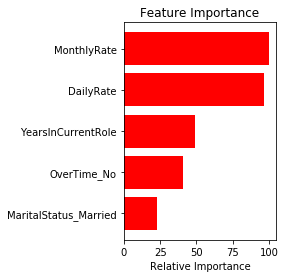

In [200]:
# 获取特征重要性
feature_importance = coef = model.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
#feature_importance = -100.0 * (feature_importance / feature_importance.max())
print(feature_importance)
print(feature_importance[0])
print(feature_importance[15])
# 重要特征可视化
show_feature_importance(train.columns, feature_importance)